In [1]:
from mtcnn.src import detect_faces
from PIL import Image
import cv2
import numpy as np
import  matplotlib.pyplot as plt
import random

## Face Detection: bounding boxes and landmarks

In [2]:
# Read original image
original_image = Image.open('images/jf.jpg')
bounding_boxes, landmarks = detect_faces(original_image, thresholds=[0.6, 0.7, 0.85])

In [3]:
# Convert type to int32 format
landmarks = landmarks.reshape((-1,5,2), order='F').astype(int)
bounding_boxes = bounding_boxes.astype(int)

In [4]:
# Visualization
image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)
# Loop each face
for i in range(len(landmarks)):
    lmk = landmarks[i]
    box = bounding_boxes[i]
    # Different color denote different face
    color = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    # Label the detected landmark
    for x,y in lmk:
        cv2.circle(image, [x,y], 1, color, 8)
    # Label the face box
    cv2.rectangle(image, (box[0],box[1]),(box[2], box[3]), color, 2)

In [5]:
def imshow(img):
    """
    jupyter imshow
    """
    plt.figure(dpi=300)
    plt.axis('off')
    img = img[:,:,::-1] 	# transform image to rgb
    plt.imshow(img)
    plt.show()

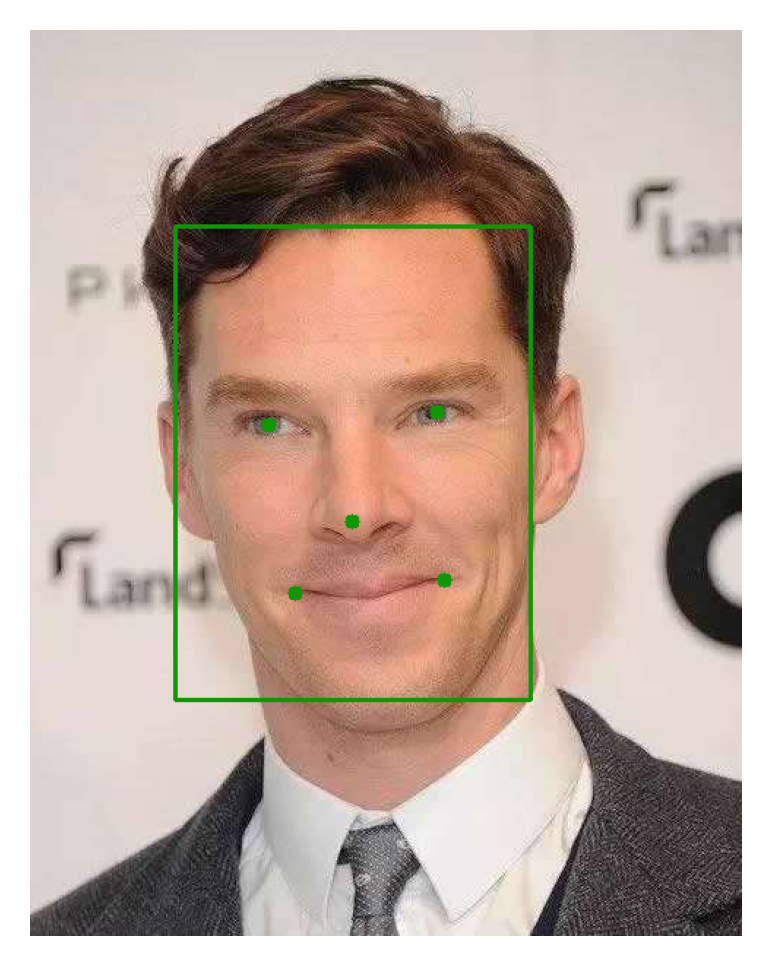

True

In [6]:
imshow(image)
cv2.imwrite("./images/jf-detected.jpg",image)

In [13]:
def detect_visualization(image_path):
    """
    image: a path
    """
    # Read original image
    original_image = Image.open(image_path)
    bounding_boxes, landmarks = detect_faces(original_image, min_face_size=10.0, thresholds=[0.6, 0.7, 0.85])
    # Convert type to int32 format
    landmarks = landmarks.reshape((-1,5,2), order='F').astype(int)
    bounding_boxes = bounding_boxes.astype(int)
    
    # Visualization
    image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)
    # Loop each face
    for i in range(len(landmarks)):
        lmk = landmarks[i]
        box = bounding_boxes[i]
        # Different color denote different face
        color = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        # Label the detected landmark
        for x,y in lmk:
            cv2.circle(image, [x,y], 1, color, 3)
        # Label the face box
        cv2.rectangle(image, (box[0],box[1]),(box[2], box[3]), color, 2)
    
    imshow(image)
    if ".jpg" in image_path:
        save_path = image_path.replace(".jpg","-detected.jpg")
    elif ".png" in image_path:
        save_path = image_path.replace(".png","-detected.png")
    if ".jpeg" in image_path:
        save_path = image_path.replace(".jpeg","-detected.jpeg")
    cv2.imwrite(save_path, image)

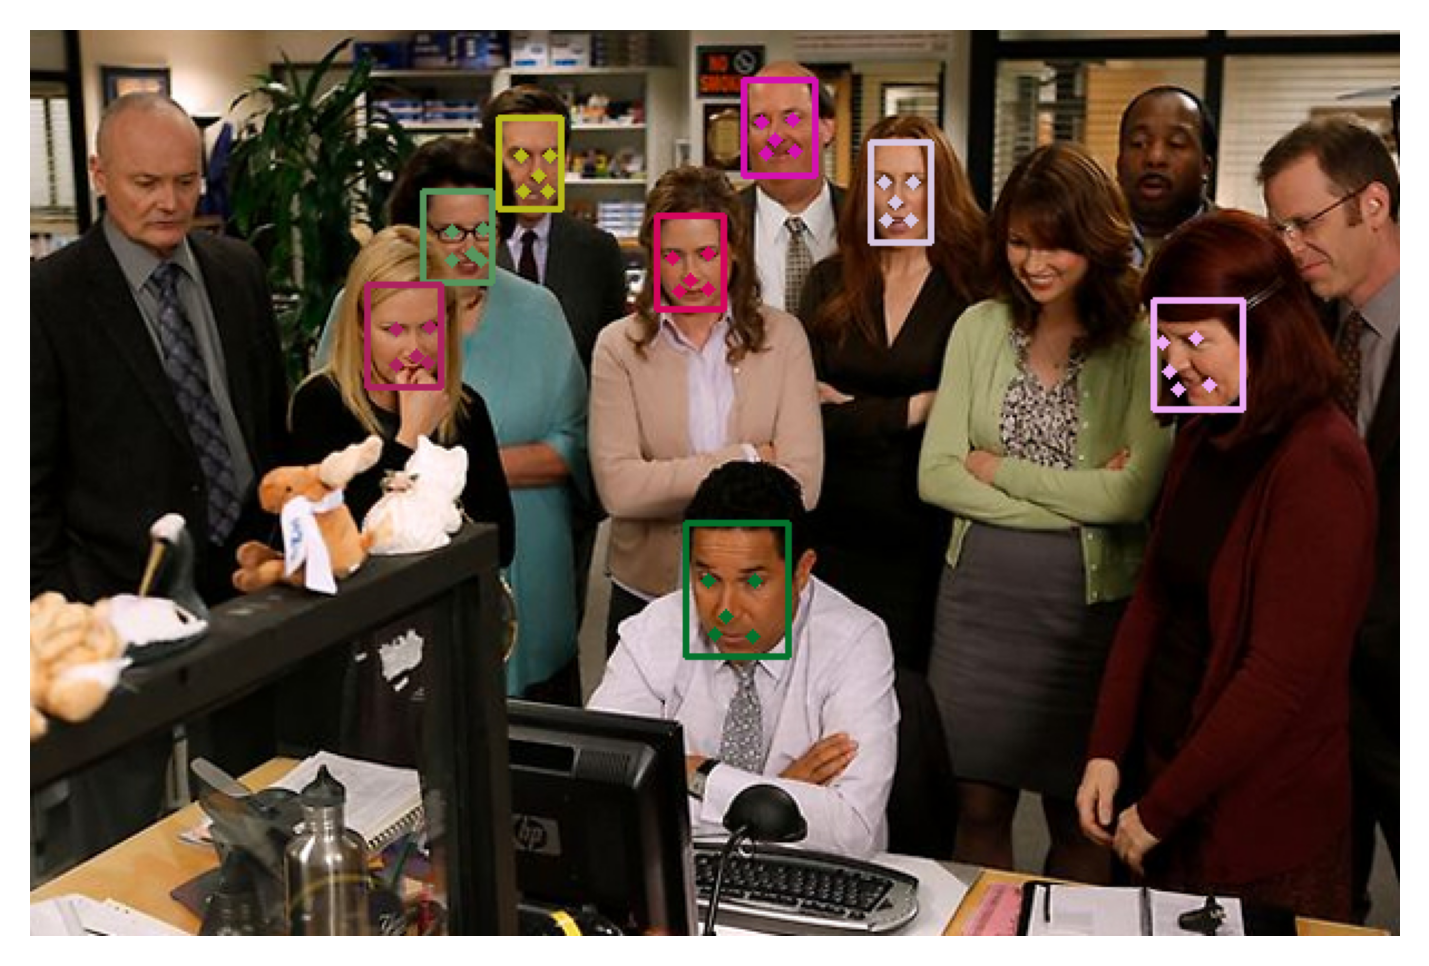

In [14]:
detect_visualization("./images/office.jpg")